In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/DLCV

/content/drive/MyDrive/DLCV


In [3]:
ls

dataset/


In [4]:
import os
from PIL import Image
import numpy as np
import pandas as pd

data=[]
basepath='./dataset/'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=np.array(Image.open(file.path))
            features=np.mean(im, axis=(0, 1)).tolist()
            features.append(folder.name)
            data.append(features)
            print(features)
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

        

[197.16122829156902, 180.73294498527733, 164.08541779340183, 'melon']
[196.76813440860215, 141.60835752688172, 129.94942204301074, 'melon']
[201.3431324341315, 178.40347688611425, 150.45888547936337, 'melon']
[165.8051543252595, 171.06257162629757, 143.5887723183391, 'melon']
[201.55523120110044, 178.40324036324932, 150.45871119935765, 'melon']
[168.29711584300017, 166.91663356109964, 147.62223899570952, 'melon']
[217.5800510901206, 207.0518030060001, 196.40848333630368, 'melon']
[216.19540983606558, 224.07183308494783, 198.71644311972182, 'melon']
[166.0028049382716, 170.96462222222223, 143.59648395061728, 'melon']
[183.69758646481884, 166.24613844905872, 158.61590341645334, 'melon']
[191.58778156725887, 189.28729774746193, 163.04090656725887, 'melon']
[183.684125027654, 166.23799079253712, 158.60052252878648, 'melon']
[167.78494814814815, 185.99334320987654, 154.65552592592593, 'melon']
[196.47086021505376, 141.29916666666668, 129.6099059139785, 'melon']
[197.14062030527012, 180.7288

In [5]:
df = pd.read_csv('curdata.csv')

print(df)

lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

             R           G           B  class
0   197.161228  180.732945  164.085418  melon
1   196.768134  141.608358  129.949422  melon
2   201.343132  178.403477  150.458885  melon
3   165.805154  171.062572  143.588772  melon
4   201.555231  178.403240  150.458711  melon
5   168.297116  166.916634  147.622239  melon
6   217.580051  207.051803  196.408483  melon
7   216.195410  224.071833  198.716443  melon
8   166.002805  170.964622  143.596484  melon
9   183.697586  166.246138  158.615903  melon
10  191.587782  189.287298  163.040907  melon
11  183.684125  166.237991  158.600523  melon
12  167.784948  185.993343  154.655526  melon
13  196.470860  141.299167  129.609906  melon
14  197.140620  180.728821  164.112516  melon
15  189.823599  166.848825  138.574727  melon
16  199.082321  173.717302  156.207361  melon
17  165.781071  171.099615  143.586696  melon
18  148.120454  129.730706   84.095644  melon
19  148.120454  129.730706   84.095644  melon
20  240.678610  220.366885  163.53

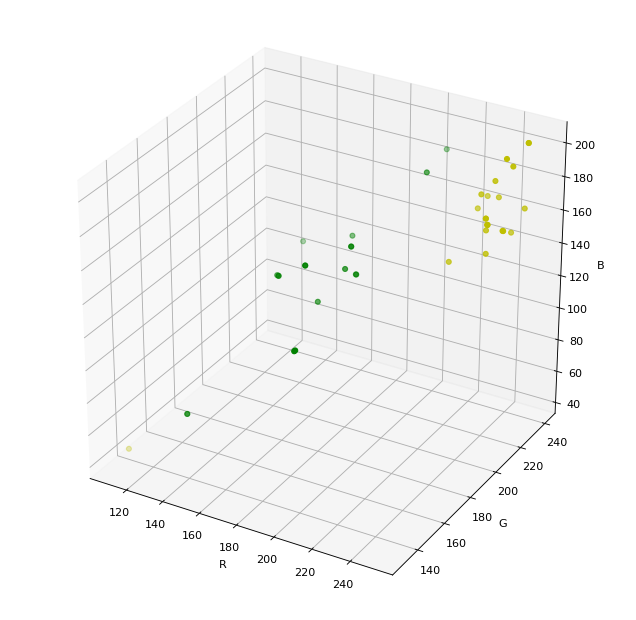

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[[197.16122829 180.73294499 164.08541779]
 [196.76813441 141.60835753 129.94942204]
 [201.34313243 178.40347689 150.45888548]
 [165.80515433 171.06257163 143.58877232]
 [201.5552312  178.40324036 150.4587112 ]
 [168.29711584 166.91663356 147.622239  ]
 [217.58005109 207.05180301 196.40848334]
 [216.19540984 224.07183308 198.71644312]
 [166.00280494 170.96462222 143.59648395]
 [183.69758646 166.24613845 158.61590342]
 [191.58778157 189.28729775 163.04090657]
 [183.68412503 166.23799079 158.60052253]
 [167.78494815 185.99334321 154.65552593]
 [196.47086022 141.29916667 129.60990591]
 [197.14062031 180.72882113 164.11251577]
 [189.82359924 166.84882479 138.57472697]
 [199.08232143 173.71730159 156.20736111]
 [165.78107128 171.09961522 143.58669619]
 [148.12045432 129.73070617  84.09564444]
 [148.12045432 129.73070617  84.09564444]
 [240.67860972 220.36688542 163.53539792]
 [239.03539722 221.49411944 166.02510556]
 [248.17161814 227.8677956  156.13703704]
 [240.57896296 220.28397037 163.49

In [8]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[6 0]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://anaconda.org/DistrictDataLabs/yellowbrick

Enter image path : /content/drive/MyDrive/DLCV/dataset/melon/6.jpg
It is a melon


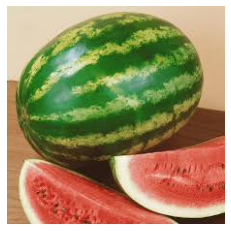

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

image=input("Enter image path : ")
im=np.array(Image.open(image))
features=np.mean(im, axis=(0, 1)).tolist()
yp=svclassifier.predict([features])
yp=le.inverse_transform(yp)
print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()